In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('cleandata.csv')

In [3]:
df.head

<bound method NDFrame.head of       Unnamed: 0        Lat       Long_  Deaths  Case_Fatality_Ratio  \
0              0  33.939110   67.709953   549.0             3.779217   
1              1  41.153300   20.168300   142.0             1.077234   
2              2  28.033900    1.659600   268.0             2.536905   
3              3  42.506300    1.521800   165.0             0.345543   
4              4 -11.202700   17.873900   246.0             1.836434   
...          ...        ...         ...     ...                  ...   
3967        4011  31.952200   35.233200   126.0             0.811686   
3968        4012  39.904200  116.407400     0.0             0.000000   
3969        4013  15.552727   48.516388  2347.0            18.074508   
3970        4014 -13.133897   27.849332   179.0             1.201603   
3971        4015 -19.015438   29.154857   307.0             2.168235   

      confirmed cases  
0             14527.0  
1             13182.0  
2             10564.0  
3        

In [4]:
label_encoder = LabelEncoder()

In [5]:
df.shape

(3972, 6)

In [6]:
df.tail

<bound method NDFrame.tail of       Unnamed: 0        Lat       Long_  Deaths  Case_Fatality_Ratio  \
0              0  33.939110   67.709953   549.0             3.779217   
1              1  41.153300   20.168300   142.0             1.077234   
2              2  28.033900    1.659600   268.0             2.536905   
3              3  42.506300    1.521800   165.0             0.345543   
4              4 -11.202700   17.873900   246.0             1.836434   
...          ...        ...         ...     ...                  ...   
3967        4011  31.952200   35.233200   126.0             0.811686   
3968        4012  39.904200  116.407400     0.0             0.000000   
3969        4013  15.552727   48.516388  2347.0            18.074508   
3970        4014 -13.133897   27.849332   179.0             1.201603   
3971        4015 -19.015438   29.154857   307.0             2.168235   

      confirmed cases  
0             14527.0  
1             13182.0  
2             10564.0  
3        

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3972 entries, 0 to 3971
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3972 non-null   int64  
 1   Lat                  3972 non-null   float64
 2   Long_                3972 non-null   float64
 3   Deaths               3972 non-null   float64
 4   Case_Fatality_Ratio  3972 non-null   float64
 5   confirmed cases      3840 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 186.3 KB


In [8]:
df.describe().T

c:\Users\devza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3972.0,2009.324018,1158.460376,0.0000,1009.750000,2011.500000,3012.250000,4015.000000
Lat,3972.0,35.747662,13.350749,-71.9499,33.235227,37.895700,42.056212,71.706900
Long_,3972.0,-71.283427,55.020503,-178.1165,-96.424580,-86.717326,-77.474545,178.065000
Deaths,3972.0,86.993706,114.432817,0.0000,42.750000,76.000000,108.000000,5375.000000
Case_Fatality_Ratio,3972.0,3.904119,123.020033,0.0000,0.890466,1.285465,1.737771,7570.769231
confirmed cases,3840.0,inf,NaN,0.0000,3533.750000,6169.000000,10069.500000,inf


In [9]:
df.isnull().sum()

Unnamed: 0               0
Lat                      0
Long_                    0
Deaths                   0
Case_Fatality_Ratio      0
confirmed cases        132
dtype: int64

In [10]:
cat_cols= df.select_dtypes(include= 'O').columns.tolist()

In [11]:
cat_cols

[]

In [12]:
for col in cat_cols:
    print(df[col].value_counts())

In [13]:
df.shape

(3972, 6)

In [14]:
df.replace([np.inf, -np.inf], np.nan, inplace= True)
# Outliers in data

In [15]:
plt.figure(figsize=(3,3))

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

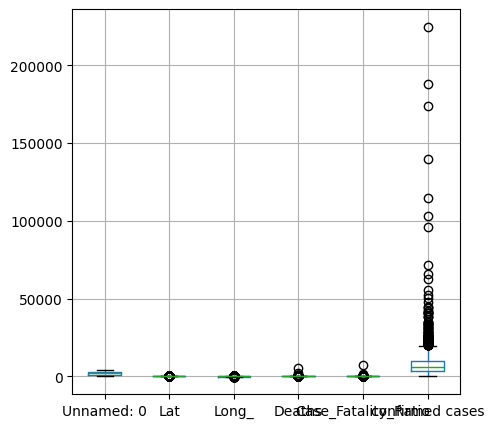

In [16]:
df.boxplot(figsize= (5,5))
plt.show()

<Axes: ylabel='Lat'>

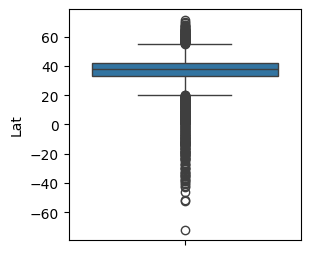

In [17]:
plt.figure(figsize=(3,3))
sns.boxplot(df['Lat'])

<Axes: ylabel='Long_'>

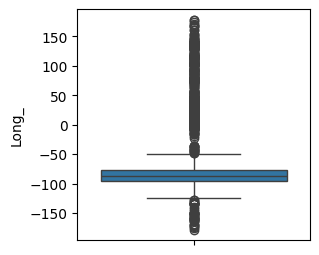

In [18]:
plt.figure(figsize=(3,3))
sns.boxplot(df['Long_'])

<Axes: ylabel='Deaths'>

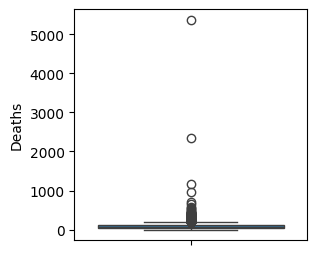

In [19]:
plt.figure(figsize=(3,3))
sns.boxplot(df['Deaths'])

<Axes: ylabel='Case_Fatality_Ratio'>

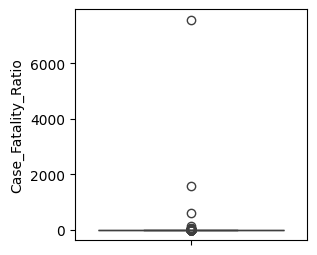

In [20]:
plt.figure(figsize=(3,3))
sns.boxplot(df['Case_Fatality_Ratio'])

In [21]:
from scipy.stats import skew

skewness = skew(df['Deaths'])
print('Skewness: ', skewness)

Skewness:  27.47812350533922


In [22]:
q1 = df['Deaths'].quantile(0.25)
q3 = df['Deaths'].quantile(0.75)

iqr = q3- q1

In [23]:
lower_limit = q1- 1.5 * iqr
upper_limit = q3 +1.5 * iqr

df = df[(df['Deaths'] >= lower_limit) &
        (df['Deaths'] <= upper_limit)]

In [24]:
df.shape

(3814, 6)

In [25]:
# # Pair Plot
# plt.figure(figsize= (5,3))

# for i, col in  enumerate(num_cols, 1):
#     plt.subplot(2,3,i)
#     sns.histplot(data= df, x= col)
# plt.show()

<Axes: >

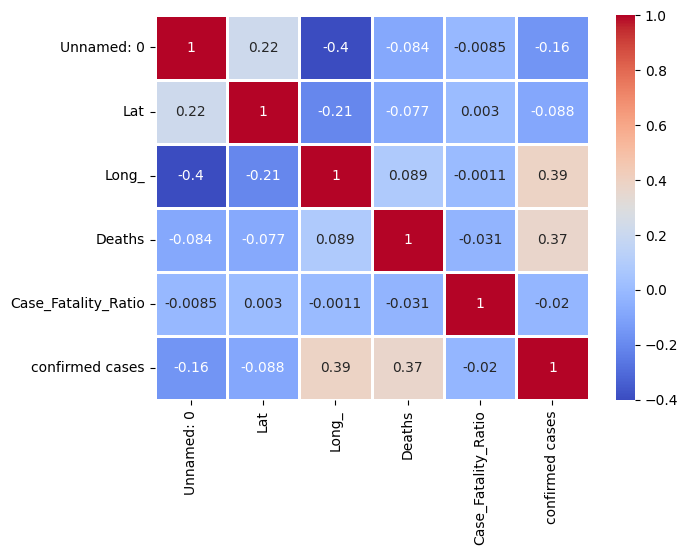

In [26]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only= True), annot= True, cmap= 'coolwarm', linewidths=2)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x= df.drop(['Case_Fatality_Ratio'], axis= 1)
y= df['Deaths']

In [29]:
# Splitting Data Into Train and test
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [30]:
cat_cols= X_train.select_dtypes(include= "O").columns.tolist()
num_cols= X_train.select_dtypes(exclude= "O").columns.tolist()

In [31]:
cat_cols

[]

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [33]:
# Column Transformation For the Numerical and categorical features
enc= OneHotEncoder(handle_unknown= 'ignore')
sc= StandardScaler()

ct= ColumnTransformer(
        [
            ('encoding', enc, cat_cols),
            ('scaling', sc, num_cols)
        ]
)

In [34]:
X_train= ct.fit_transform(X_train)
X_test = ct.transform(X_test)